In [13]:
import os
import pandas as pd
import numpy as np
from google.cloud import bigquery
import matplotlib.pyplot as plt

In [14]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/piyush/Desktop/plane-detection-352701-90220d8b4de6.json'
client = bigquery.Client()

In [ ]:
formated_query = f"""
            SELECT YEAR_MFR 
            FROM `plane-detection-352701.SPY_PLANE.FAA`
            WHERE COUNTRY = 'US'
            """

In [ ]:
df = client.query(formated_query).to_dataframe()
df = df.dropna()

In [ ]:
df['YEAR'] = pd.DatetimeIndex(df['YEAR_MFR']).year

In [ ]:
min_year=2000
max_year=2005
df = df[(df['YEAR'] >= min_year) & (df['YEAR'] <= max_year)]

In [ ]:
df

In [ ]:
buckets = 5
bins = np.linspace(min_year, max_year, buckets)
df['bins'] = pd.cut(df['YEAR'], bins=bins, include_lowest=True)

In [ ]:
plt.figure(figsize=(7, 8))
values, bins, bars = plt.hist(df['YEAR'], bins=buckets-1, edgecolor='white')
plt.title(f'Aircraft Registration between {min_year} and {max_year}')
plt.xlabel('Years')
plt.ylabel('Count of Registration')
plt.bar_label(bars, fontsize=10, color='black')
plt.margins(x=0.01, y=0.1)
plt.show()

---

# GeoPandas

In [39]:
import matplotlib.pyplot as plt
import geopandas

In [40]:
states = geopandas.read_file('/Users/piyush/Downloads/geopandas-tutorial-master/data/usa-states-census-2014.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [41]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


In [42]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."
5,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,Midwest,"POLYGON Z ((-91.50617 40.20064 0.00000, -91.49..."
6,19,01779785,0400000US19,19,IA,Iowa,00,144668594415,1076856589,Midwest,"POLYGON Z ((-96.62187 42.77925 0.00000, -96.57..."
7,21,01779786,0400000US21,21,KY,Kentucky,00,102262419204,2393338940,Southeast,"POLYGON Z ((-89.54443 36.57451 0.00000, -89.47..."
8,22,01629543,0400000US22,22,LA,Louisiana,00,111901043977,23750204105,Southeast,"POLYGON Z ((-94.04305 32.69303 0.00000, -94.04..."
9,24,01714934,0400000US24,24,MD,Maryland,00,25147575220,6983455225,Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ..."


In [6]:
states = states.to_crs("EPSG:3395")

<AxesSubplot:>

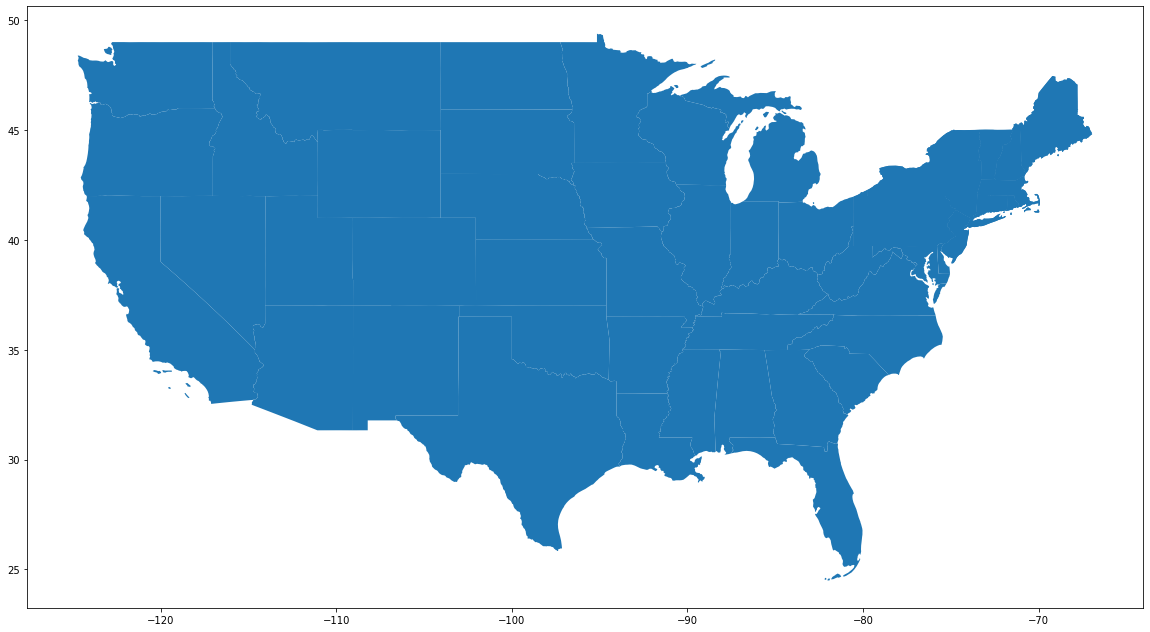

In [31]:
states.plot(figsize = (20,20))


<AxesSubplot:>

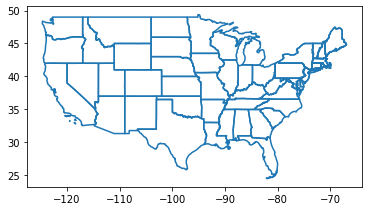

In [32]:
states.boundary.plot()

In [43]:
formated_query = f"""
            SELECT 
            -- N_NUMBER, 
            STATE AS STUSPS,
            COUNT(*) AS COUNT
            FROM `plane-detection-352701.SPY_PLANE.FAA` 
            WHERE COUNTRY = 'US' -- AND STATE IN ('MA', 'TX')
            GROUP BY
            STATE
            ORDER BY 1
            """

In [44]:
df = client.query(formated_query).to_dataframe()
df = df.dropna()

In [45]:
df

,STUSPS,COUNT
0,AA,2
1,AE,12
2,AK,9377
3,AL,4762
4,AP,20
5,AR,3645
6,AZ,8249
7,CA,28865
8,CO,7154
9,CT,2251


In [46]:
states = states.merge(df, on='STUSPS')

In [83]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,COUNT
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",28865
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...",389
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",21159
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...",8432
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117....",3717
5,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,Midwest,"POLYGON Z ((-91.50617 40.20064 0.00000, -91.49...",8559
6,19,01779785,0400000US19,19,IA,Iowa,00,144668594415,1076856589,Midwest,"POLYGON Z ((-96.62187 42.77925 0.00000, -96.57...",3670
7,21,01779786,0400000US21,21,KY,Kentucky,00,102262419204,2393338940,Southeast,"POLYGON Z ((-89.54443 36.57451 0.00000, -89.47...",2623
8,22,01629543,0400000US22,22,LA,Louisiana,00,111901043977,23750204105,Southeast,"POLYGON Z ((-94.04305 32.69303 0.00000, -94.04...",4250
9,24,01714934,0400000US24,24,MD,Maryland,00,25147575220,6983455225,Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",2726


<AxesSubplot:>

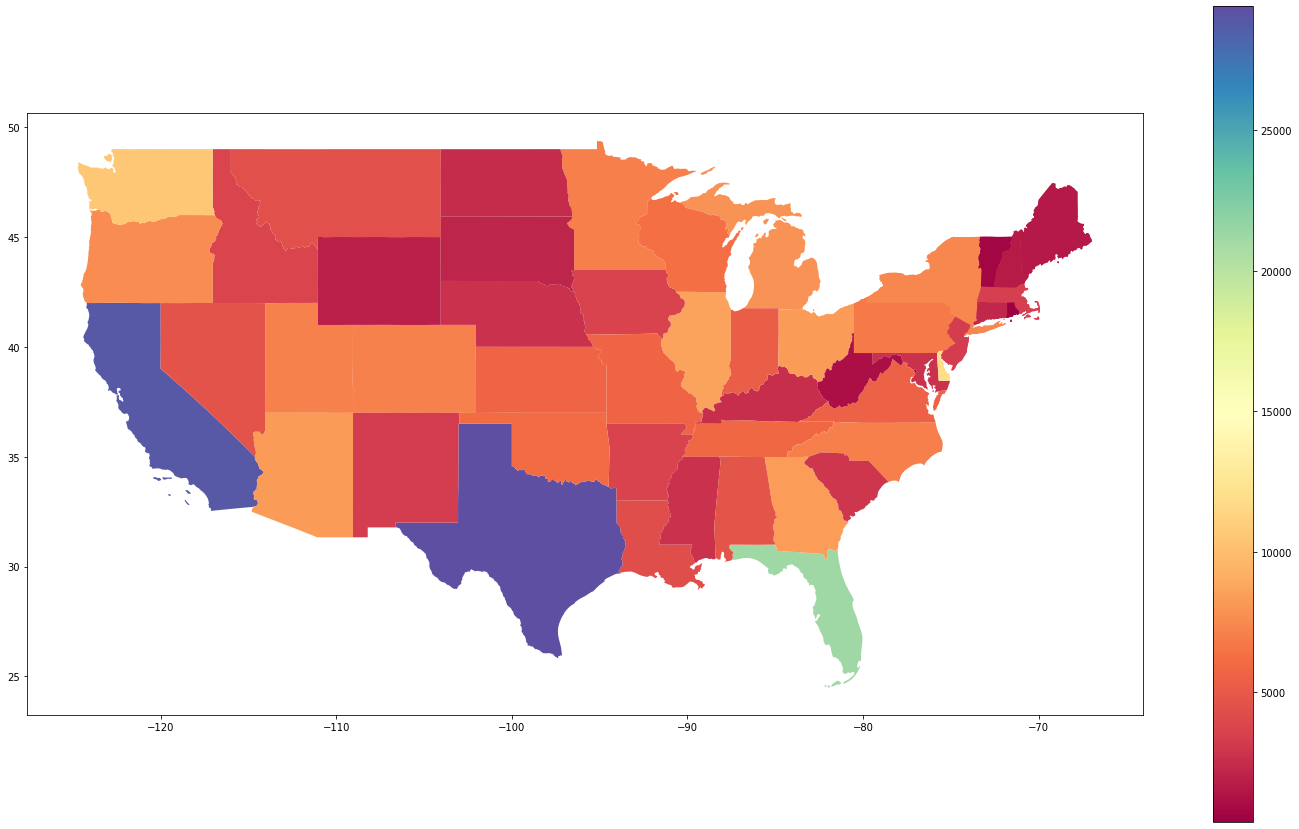

In [81]:
states.plot(column = 'COUNT', figsize = (25,15), cmap = 'Spectral', legend = True)

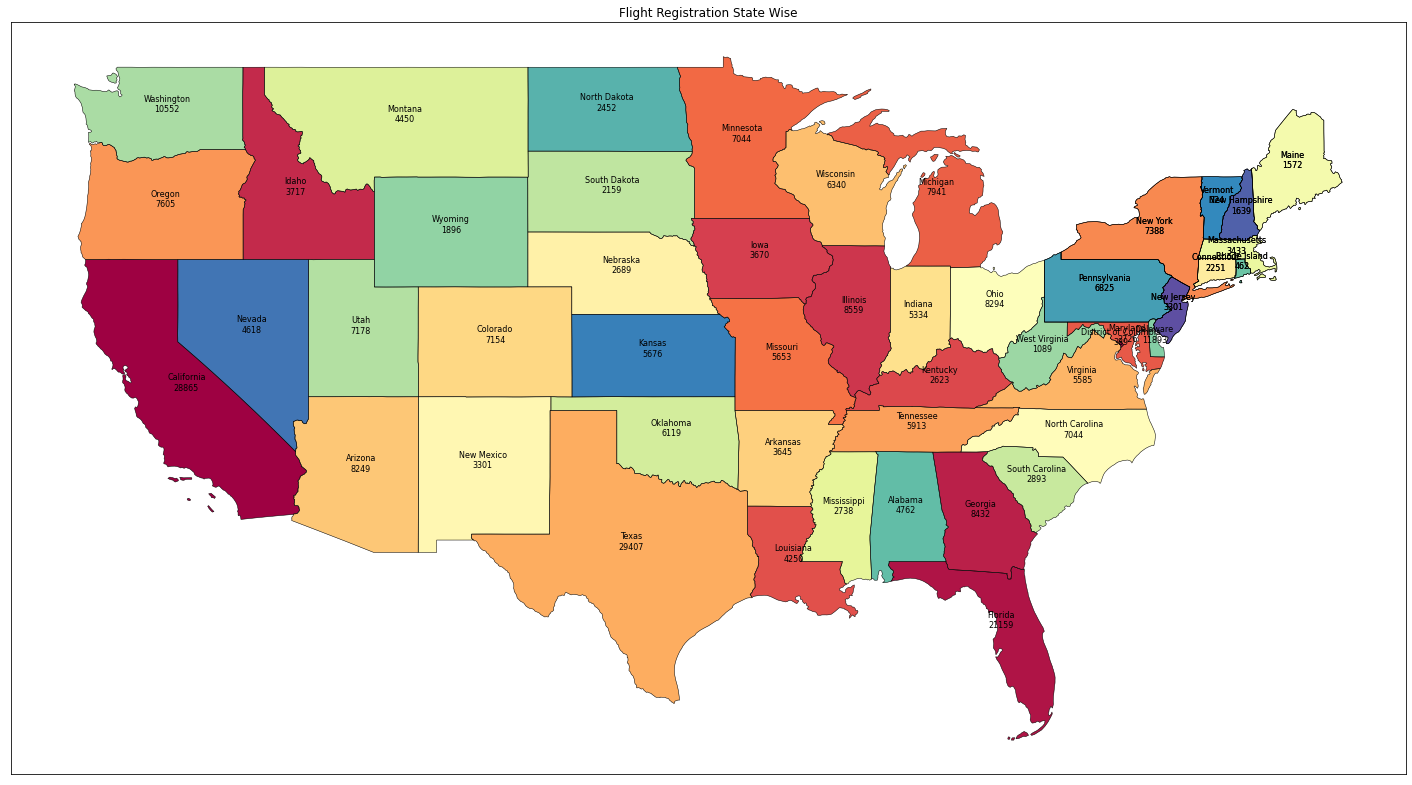

In [85]:
# states.plot(column = 'COUNT', figsize = (15,15), cmap = 'Spectral', legend = True)
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
states.apply(lambda x: ax.annotate(text=x.NAME + "\n" + str(x.COUNT), xy=x.geometry.centroid.coords[0], ha='center', fontsize=8),axis=1)
states.boundary.plot(ax=ax, color='Black', linewidth=.5)
states.plot(ax = ax, figsize = (25,15), cmap = 'Spectral', legend = True)
# states.plot(column = 'COUNT', figsize = (25,15), cmap = 'Spectral', legend = True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.title('Flight Registration State Wise')
plt.show()
# ax.text(-0.05, 0.5, 'DAMG7245', transform=ax.transAxes,
#         fontsize=20, color='gray', alpha=0.5,
#         ha='center', va='center', rotation='90')
# ax.text(-0.05, 0.5, 'DAMG7245', transform=ax.transAxes,
#         fontsize=20, color='gray', alpha=0.5,
#         ha='center', va='center', rotation='90')

<AxesSubplot:>

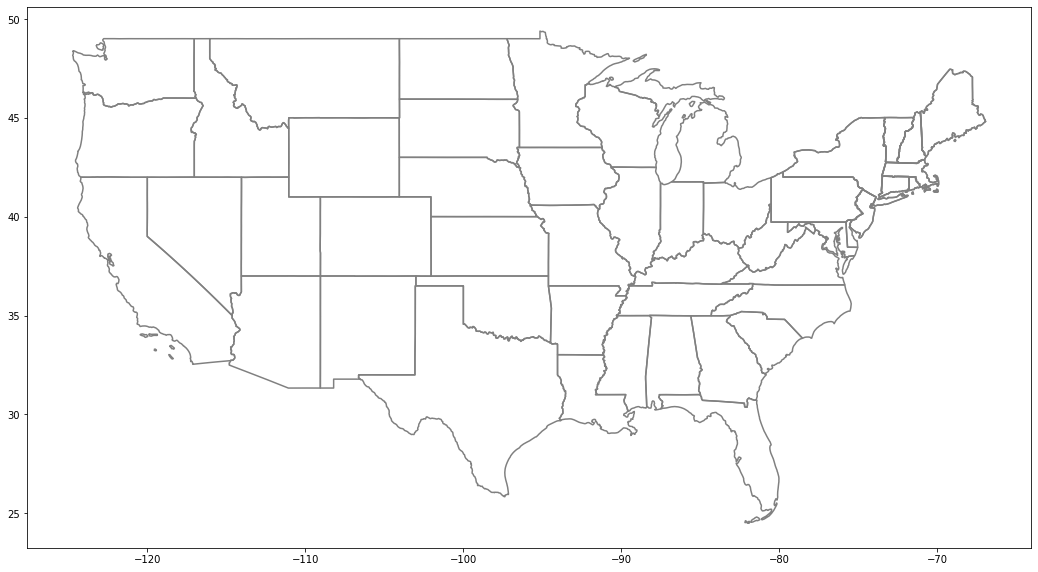

In [84]:
states.boundary.plot(figsize=(18, 12), color="Gray")

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
west.apply(lambda x: ax.annotate(
    s=x.NAME + "\n" + str(math.floor(x.ALAND / 2589988.1103)) + " sq mi", 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=14